## PH-IMDB: practice with data cleaning


The goal is to get all movies from the Philippine region, get the ratings, year of release, genre and run time

###  Download dataset from IMDB and put into a pandas dataframe

In [1]:
# download data set from imdb
import requests

# unique identifier for title and rating sets
links = ['akas','basics', 'ratings']

for item in links:
    r = requests.get(f'https://datasets.imdbws.com/title.{item}.tsv.gz', allow_redirects=True)
    open(f'{item}.tsv.gz', 'wb').write(r.content)

In [2]:
# open downloaded gzip file and read tsv with pandas
import os
import pandas as pd
import seaborn as sns

# get all downloaded files with gzip type
proj_path = os.path.abspath('')
files = [file for file in os.listdir(proj_path) if file.endswith('.gz')]

# create a list of dfs to hold data to be extracted
df_list = []        

# extract data, make a df and add to list
for file in files:
    frame = pd.read_csv(file, delimiter='\t', compression='gzip')
    df_list.append(frame)

C:\Users\Vanessa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Vanessa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Clean each dataframe

1. Inspect contents of first df, renamed to df_ph

In [3]:
# create a copy of df from akas.tsv.gz for projects in PH region
df_ph = df_list[0].copy()

In [4]:
# filter only items where region is set to PH, inspect
df_ph = df_ph[df_ph['region'] == 'PH']

print(f'Size of data: {df_ph.shape}')
df_ph.head()

Size of data: (35636, 8)


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
46465,tt0013619,4,Sodom Und Gomorrha,PH,en,imdbDisplay,\N,0
51451,tt0014699,3,The Battling Fool,PH,en,imdbDisplay,\N,0
51845,tt0014797,1,Conductor 1492,PH,en,imdbDisplay,\N,0
52950,tt0015016,7,The Iron Horse,PH,en,imdbDisplay,\N,0
59817,tt0016368,6,Soft Shoes,PH,en,imdbDisplay,\N,0


In [5]:
# investigate titleID
print(df_ph.titleId.value_counts().head())

# inspect first entry
df_ph[df_ph.titleId == 'tt1417579']

tt1417579    6
tt1071213    6
tt1250897    6
tt1030467    5
tt1236382    5
Name: titleId, dtype: int64


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
12347184,tt1417579,1,Whatever Yaya,PH,en,working,\N,0
12347185,tt1417579,2,Ang Spoiled Brat,PH,en,working,\N,0
12347187,tt1417579,4,Yaya,PH,tl,working,\N,0
12347188,tt1417579,5,Yaya & Angelina: The Spoiled Brat Movie,PH,\N,\N,\N,0
12347189,tt1417579,6,Ang Spoiled: The Movie,PH,en,\N,original script title,0
12347190,tt1417579,7,Yaya at Angelina,PH,tl,working,\N,0


<b>Author's Note: </b>Based on titleId, a project can have several titles along its development. Therefore the unique titleIds will be taken from this df and used as filter to the second df. Ordering, title, region, types, attributes and isOriginalTitle will be dropped since these data are not needed

In [6]:
# remove duplicated title Ids, get only 1st entry
df_ph = df_ph.drop_duplicates(subset=['titleId'])

# drop columns that will not be used
df_ph = df_ph.drop(columns=['ordering', 'title', 'region', 'types', 'attributes', 'isOriginalTitle'])
df_ph.head()

,titleId,language
46465,tt0013619,en
51451,tt0014699,en
51845,tt0014797,en
52950,tt0015016,en
59817,tt0016368,en


In [7]:
df_ph.shape

(33778, 2)

2. Inspect contents of 2nd df, renamed to df_basics and join with df_ph

In [8]:
# create copy of df from basic.tsv.gz extact
df_basics = df_list[1].copy()

# drop columns that will not be used
df_basics = df_basics.drop(columns=['titleType', 'isAdult','endYear'])
df_basics.head()

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
0,tt0000001,Carmencita,Carmencita,1894,1,"Documentary,Short"
1,tt0000002,Le clown et ses chiens,Le clown et ses chiens,1892,5,"Animation,Short"
2,tt0000003,Pauvre Pierrot,Pauvre Pierrot,1892,4,"Animation,Comedy,Romance"
3,tt0000004,Un bon bock,Un bon bock,1892,12,"Animation,Short"
4,tt0000005,Blacksmith Scene,Blacksmith Scene,1893,1,"Comedy,Short"


In [9]:
df_basics.shape

(8720035, 6)

In [10]:
# join df_basic to df_ph
df_ph = df_ph.merge(df_basics, how='inner',left_on='titleId', right_on='tconst')

# remove key from df_basics
df_ph.drop(columns=['tconst'], inplace=True)

df_ph.head()

,titleId,language,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
0,tt0013619,en,Sodom and Gomorrah,Sodom und Gomorrha,1922,150,Drama
1,tt0014699,en,The Battling Fool,The Battling Fool,1924,44,"Drama,Short,Sport"
2,tt0014797,en,Conductor 1492,Conductor 1492,1924,70,Comedy
3,tt0015016,en,The Iron Horse,The Iron Horse,1924,150,"History,Romance,Western"
4,tt0016368,en,Soft Shoes,Soft Shoes,1925,60,Western


In [11]:
df_ph.shape

(33772, 7)

<b>Author's Note: </b>Rows where 'titleId' is present but have no matching 'tconst' in df_basics were automatically dropped due to 'inner' merge

3. Inspect last df (df_rating) and join to df_ph

In [12]:
df_rating = df_list[2].copy()
print(df_rating.shape)
df_rating.head()

(1217906, 3)


,tconst,averageRating,numVotes
0,tt0000001,5.7,1863
1,tt0000002,6.0,243
2,tt0000003,6.5,1631
3,tt0000004,6.0,158
4,tt0000005,6.2,2457


In [13]:
# join df_rating to df_ph
df_ph = df_ph.merge(df_rating, how='inner', left_on='titleId', right_on='tconst')

# drop key from rating
df_ph.drop(columns=['tconst'], inplace=True)

df_ph.head()

,titleId,language,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0013619,en,Sodom and Gomorrah,Sodom und Gomorrha,1922,150,Drama,6.0,204
1,tt0014699,en,The Battling Fool,The Battling Fool,1924,44,"Drama,Short,Sport",5.4,12
2,tt0014797,en,Conductor 1492,Conductor 1492,1924,70,Comedy,6.3,65
3,tt0015016,en,The Iron Horse,The Iron Horse,1924,150,"History,Romance,Western",7.2,2158
4,tt0016368,en,Soft Shoes,Soft Shoes,1925,60,Western,6.6,21


In [14]:
df_ph.shape

(13324, 9)

<b>Author's Note: </b>Rows where 'titleId' is present but have no matching 'tconst' in df_ratings were automatically dropped due to 'inner' merge

### Preprocess unified dataframe

<b>Author's Note:</b> There are no null values per se, but \N is used as placeholder for cells with no value. Each column will be cleaned one by one

In [15]:
df_ph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13324 entries, 0 to 13323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   titleId         13324 non-null  object 
 1   language        13324 non-null  object 
 2   primaryTitle    13324 non-null  object 
 3   originalTitle   13324 non-null  object 
 4   startYear       13324 non-null  object 
 5   runtimeMinutes  13324 non-null  object 
 6   genres          13324 non-null  object 
 7   averageRating   13324 non-null  float64
 8   numVotes        13324 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 1.0+ MB


In [16]:
df_ph.head()

,titleId,language,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0013619,en,Sodom and Gomorrah,Sodom und Gomorrha,1922,150,Drama,6.0,204
1,tt0014699,en,The Battling Fool,The Battling Fool,1924,44,"Drama,Short,Sport",5.4,12
2,tt0014797,en,Conductor 1492,Conductor 1492,1924,70,Comedy,6.3,65
3,tt0015016,en,The Iron Horse,The Iron Horse,1924,150,"History,Romance,Western",7.2,2158
4,tt0016368,en,Soft Shoes,Soft Shoes,1925,60,Western,6.6,21


In [17]:
# create function that can count number of \N for each column (an alternative to using heatmaps)
def check_N(frame):
    for col in frame.columns:
        empty = sum(frame[col] == "\\N")
        print(f'Number of empty values in {col}: {empty}')
        
        
check_N(df_ph)

Number of empty values in titleId: 0
Number of empty values in language: 3078
Number of empty values in primaryTitle: 0
Number of empty values in originalTitle: 0
Number of empty values in startYear: 3
Number of empty values in runtimeMinutes: 2127
Number of empty values in genres: 59
Number of empty values in averageRating: 0
Number of empty values in numVotes: 0


<b>Author's Note:</b> language and genres can be easily replaced with another placeholder (ex. unspecified. startYears cannot be guessed and would be best researched for correct values or just deleted

In [18]:
# replace '\N' in languages and genres with unspecified
df_ph['language'] = df_ph['language'].replace(r'\\N','unspecified', regex=True)
df_ph['genres'] = df_ph['genres'].replace(r'\\N','unspecified', regex=True)

check_N(df_ph)

Number of empty values in titleId: 0
Number of empty values in language: 0
Number of empty values in primaryTitle: 0
Number of empty values in originalTitle: 0
Number of empty values in startYear: 3
Number of empty values in runtimeMinutes: 2127
Number of empty values in genres: 0
Number of empty values in averageRating: 0
Number of empty values in numVotes: 0


In [19]:
# finding rows where startYear is empty
df_ph[df_ph['startYear']== '\\N']

,titleId,language,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
3984,tt0495657,unspecified,Germspesyal,Germspesyal,\N,\N,"Music,Talk-Show",6.5,6
3985,tt0495658,unspecified,Germside,Germside,\N,\N,"Music,Talk-Show",5.8,6
5663,tt11743020,en,My Dear Guardian,Dear Military Uniform,\N,45,"Action,Drama,Romance",7.6,64


In [20]:
# change values manually (data from research)
df_ph.at[3984, 'startYear'] = 1978
df_ph.at[3985, 'startYear'] = 1978
df_ph.at[5663, 'startYear'] = 2021

# convert startYear to proper format
df_ph['startYear'] = pd.to_datetime(df_ph['startYear'], format = '%Y')

check_N(df_ph)

Number of empty values in titleId: 0
Number of empty values in language: 0
Number of empty values in primaryTitle: 0
Number of empty values in originalTitle: 0
Number of empty values in startYear: 0
Number of empty values in runtimeMinutes: 2127
Number of empty values in genres: 0
Number of empty values in averageRating: 0
Number of empty values in numVotes: 0


In [21]:
# inspect entries where runtime is not specified
df_ph[df_ph['runtimeMinutes'] == '\\N'].head()

,titleId,language,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
204,tt0061386,unspecified,Batman Fights Dracula,Batman Fights Dracula,1967-01-01,\N,Comedy,6.6,106
247,tt0064753,en,Sweet Kisses and Languid Caresses,Oh dolci baci e languide carezze,1970-01-01,\N,Comedy,6.7,23
266,tt0066329,unspecified,Santiago!,Santiago!,1970-01-01,\N,"Action,Drama,War",7.1,23
425,tt0074828,unspecified,"Lunes, Martes, Miyerkules, Huwebes, Biyernes, ...","Lunes, Martes, Miyerkules, Huwebes, Biyernes, ...",1976-01-01,\N,"Drama,Musical",7.6,14
460,tt0076189,unspecified,Inay,Inay,1977-01-01,\N,"Comedy,Drama",7.7,8


<b>Author's Note: </b>A lot of entries actually were aired movies that simply have incomplete data. It would be a misrepresentation to delete the entries, but so is setting an arbitrary value. For this activity and to allow basic data viz (which will have errors due to wrong data type), it is better to set values to null 

In [22]:
df_ph['runtimeMinutes'] = df_ph['runtimeMinutes'].replace('\\N',None, regex=True)

### Final Output

In [23]:
check_N(df_ph)

Number of empty values in titleId: 0
Number of empty values in language: 0
Number of empty values in primaryTitle: 0
Number of empty values in originalTitle: 0
Number of empty values in startYear: 0
Number of empty values in runtimeMinutes: 0
Number of empty values in genres: 0
Number of empty values in averageRating: 0
Number of empty values in numVotes: 0


In [24]:
df_ph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13324 entries, 0 to 13323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   titleId         13324 non-null  object        
 1   language        13324 non-null  object        
 2   primaryTitle    13324 non-null  object        
 3   originalTitle   13324 non-null  object        
 4   startYear       13324 non-null  datetime64[ns]
 5   runtimeMinutes  13324 non-null  object        
 6   genres          13324 non-null  object        
 7   averageRating   13324 non-null  float64       
 8   numVotes        13324 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 1.5+ MB


### Sample data viz (not filtered, cleaned data)

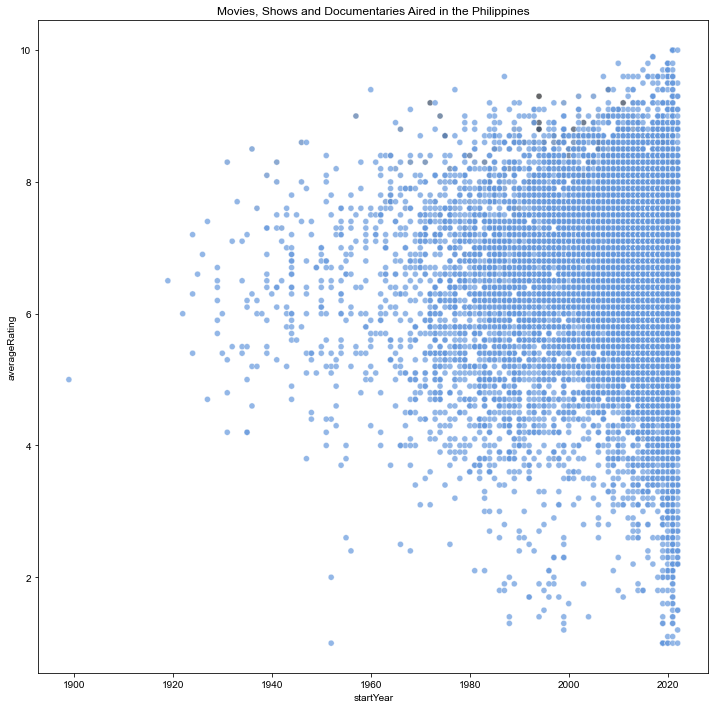

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
plt.title('Movies, Shows and Documentaries Aired in the Philippines')

sns.scatterplot(data=df_ph, 
                x='startYear', 
                y='averageRating', 
                hue='numVotes', 
                alpha = 0.7,
                palette=sns.dark_palette("#69d", reverse=True, as_cmap=True),
                legend=False,
               )
sns.set_style('ticks')